<a href="https://colab.research.google.com/github/AMMLRepos/California-Housing-Price-Prediction/blob/main/California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 
This google colab notebook is a step-by-step process to approach a Machine learning solution to predict housing prices in California, United States. 

# Business Challenges

- To avoid manual methods of predicting housing prices as they are time taking, costly and many a times not reliable and can be biased on emotional front 
- Estmations are many a times wrong by 20 %

# Expected business outcomes
- To predict the housing prices in California, United States
- To determine whether it is worth investing in a house in a specific area. 

# Questions you should ask as a Machine Learning Engineer 
- What is the end goal and expected outcome ?
- How is the process currently being carried out without Machine Learning ?
- Where is the data located and is it a reliable source ?
- How much data is available ?
- Do we have all required features to get a right prediction ?
- Do we have experts available to help understand the data which is collected ?
- How frequently data gets added, updated and deleted ?

Questions above are a few which can get you started and you might have many more as you move ahead in the process. 

# Things you need to decide before starting 

|Questions|Answers|
|----|-----|
|Is it a supervised learning or a un-supervised learning appraoch ?| Supervised learning as we have data which is labeled |
| Is it a regression task ?| Yes, we need to predict a value(price) and thus it is a regression|
|It it multiple regression problem ?|Yes, since we have many features using which we will predict a value|
|It is univariate ?|Yes, since we only need to predict one value |
|Do you need batch learning or online Learning ?|Here, we don't have a real-time data coming in to be trained. Data collection process in this case is very slow and we can perform batch learning for our model|

#Get the data 
Its time to get your data and have a quick look into it. Also, setup your development environment based on your choice and preferences. In my case, I will be using -

|Activity|Tool/Technology/Library|
|---|---|
|Programming Language | Python 3.x|
|Integrated Development Environment | Google Colab|
|Libraries | Pandas,Numpy, Matplotlib, Seaborn, Sklearn|



# Install your libraries

In [128]:
!pip install pandas numpy matplotlib seaborn sklearn opendatasets --quiet

#Download your data
The dataset we will be working at is available at [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices) and we will be using an opensource library named [opendatasets](https://github.com/JovianML/opendatasets) developed by [jovian](https://jovian.ai) 

Please note that you must provide your Kaggle Username and Key to allow opendatasets to download the files

In [129]:
import opendatasets as od 
import os
dataset_url = "https://www.kaggle.com/camnugent/california-housing-prices"
od.download(dataset_url)

#Set data directory and get the file path. Please note that it may differ in your environment and make required changes to
#paths as given below 
data_dir = "california-housing-prices"
file_name = os.listdir(data_dir)[0]
file_path = data_dir + "/" + file_name 

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


# Import required libraries
Let us now import required libraries to get the data in our working directory and have a look into it

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Also perform some basic settings like - 
- Allow jupyter notebook to show all columns 
- Allow matplotlib to show maps within jupyter notebook 


In [131]:
#Allow jupyter notebook to display all columns 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Allow matplotlib to draw visualizations in the notebook
%matplotlib inline 

#Set seaborn library theme and font size for graphs
sns.set_theme(style = "darkgrid")
sns.set_context("paper")

# Take a quick look at the data

In [132]:
raw_housing_df = pd.read_csv(file_path)
print(raw_housing_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0        -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1        -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2        -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3        -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4        -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY
...          ...       ...                 ...          ...             ...         ...       

In [133]:
print(raw_housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


The above output shows the following - 
- Number of rows and columns - 20640 rows and 10 columns 
- Size of dataset = 1.6 MB
- Number of Non-Null entries - See that we have 20640 records in all columns other than *total_bedrooms* which is *20433* and thus we have missing values in this column
- Data type of columns - All columns other than *ocean_proximity* are float type and hence are numeric. *ocean_proximity* is categorical value as it has a repeated set of values

Let us now see what categories exists in the *ocean_proximity* column and what do they mean

In [134]:
raw_housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We have 5 categories with the counts mentioned above. 
Let us know get the basic statistics on the numerical columns we have in our dataset

In [135]:
raw_housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


describe fuction will provide some basic statistics on the numerical columns of the dataset. Using the above output, we can get some inferences like - 
- Minimum number of rooms is 2 and maximum is 39320 and this is a huge range for the dataset we have 
- Minimum population is 3 and Maximum population is 35682 which is another big range 

Observing other values, we can also that that there is a significant gap in minimum and maximum values of median_house_value, median_income, households, etc. 

Describe function will given you such stats and shows how much of your data has what kind of numberical values 

Let us plot a graph to get another view

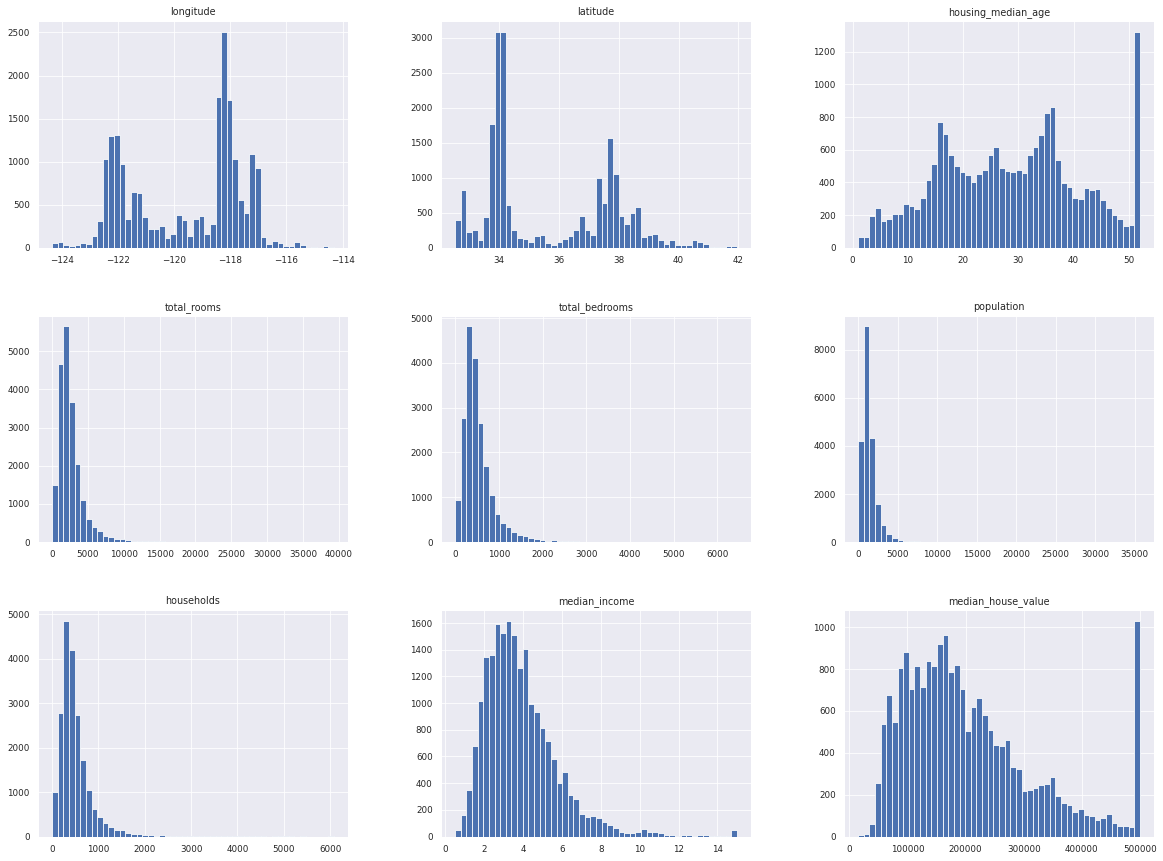

In [136]:
raw_housing_df.hist(bins = 50, figsize=(20,15))
plt.show()

# Separate your train, test and validation dataset
Sklean will provide a special function to perform train, test split and implementation is given below. After split, check the number of records in your train and test dataset

In [137]:
from sklearn.model_selection import train_test_split
housing_train_set, housing_test_set =  train_test_split(raw_housing_df, test_size = 0.2, random_state = 42)

In [138]:
len(housing_train_set)

16512

In [139]:
len(housing_test_set)

4128

The above solution is just a random split method which will randomly place your records in two categories base don the test size mentioned. This method has following issues -
- What if your data has a huge difference in categories. Example, predicting a death in heart failure is a dataset and you have 5000 records. Out of 5000 records you have 4000 records with death recorded and 1000 events with no death recorded. What if random sampling breaks this ratio and provides only say 10 records of death in train and put rest in test. This will provide model with lesser data to learn from for no-death event. 
- This will then result in lower accuracy of test results and hence a model will fail to predict with satisfactory outcomes

In our dataset we want to have various categories of median income in train and test dataset. You need to have all categories of data in your dataset and the process of doing it is called stratification.

Refer - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

Let us create median income as a categorical column by defining a new column *income_cat* which will have 5 categories with salaries falling under each category based on the range

In [140]:
raw_housing_df["income_cat"] = pd.cut(raw_housing_df["median_income"],
                              bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                              labels = [1,2,3,4,5]
                              )

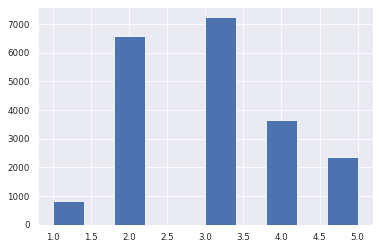

In [141]:
raw_housing_df["income_cat"].hist();

In [142]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)


for train_index, test_index in split.split(raw_housing_df, raw_housing_df["income_cat"]):
  housing_train_set = raw_housing_df.loc[train_index]
  housing_test_set = raw_housing_df.loc[test_index]

Let us now see the percentage number of records of each category in our test  and train set 

In [143]:
housing_test_set["income_cat"].value_counts() /  len(housing_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [144]:
housing_train_set["income_cat"].value_counts() / len(housing_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

It is clearly visible that both our train and test set has almost equal percentage of records for each category of income

Now since we have a right percentage of all type of records, let us get rid of *income_cat* column as this is of no use 

In [145]:
housing_test_set.drop("income_cat", axis = 1, inplace = True)
housing_train_set.drop("income_cat", axis = 1, inplace = True)

# Visualizations 

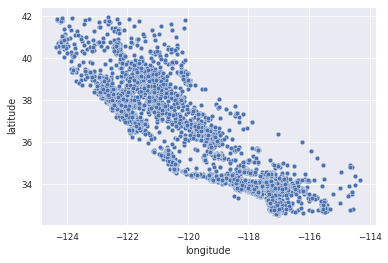

In [146]:
sns.scatterplot(x = "longitude", y = "latitude", data = housing_train_set);

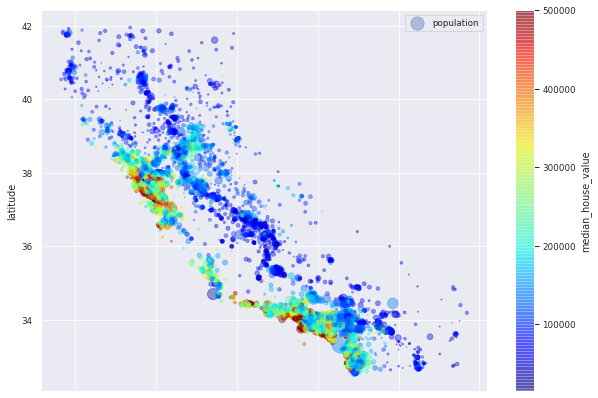

In [147]:
housing_train_set.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
             s = housing_train_set["population"] / 100, label = "population", figsize = (10, 7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True
             );

In [148]:
housing_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


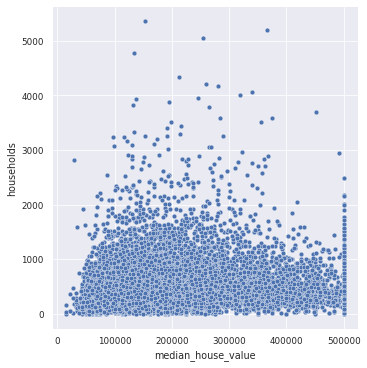

In [149]:
sns.relplot(x = "median_house_value", y = "households", data = housing_train_set);

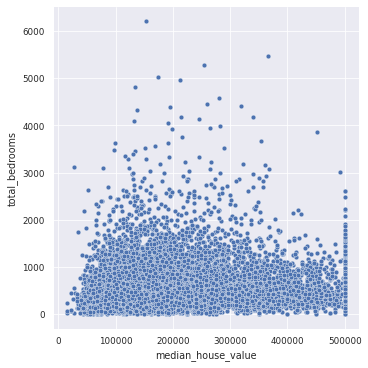

In [150]:
sns.relplot(x = "median_house_value", y = "total_bedrooms", data = housing_train_set);

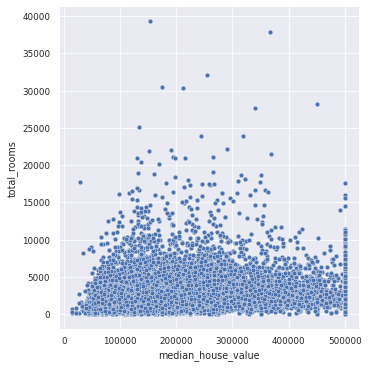

In [151]:
sns.relplot(x = "median_house_value", y = "total_rooms", data = housing_train_set);

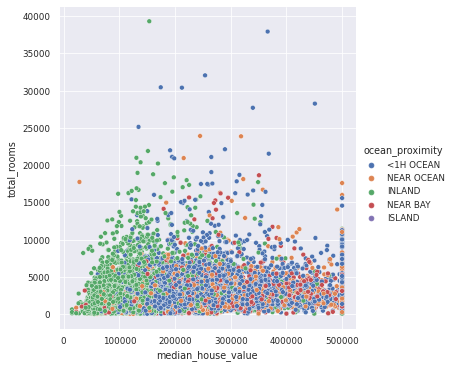

In [152]:
sns.relplot(x = "median_house_value", y = "total_rooms", hue = "ocean_proximity", data = housing_train_set);

If you see above graphs, almost all of them have a huge cluster of values in a specific section which shows that we have almost 90 to 95 percentage of records falling in that category 

Lets figure out the correlations between each feature. 
Positive values indicates that there is a correlation which says X increases with Y and negative values says X decreases with Y

In [153]:
corr_matrix = housing_train_set.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
longitude            1.000000 -0.924478           -0.105848     0.048871        0.076598    0.108030    0.063070      -0.019583           -0.047432
latitude            -0.924478  1.000000            0.005766    -0.039184       -0.072419   -0.115222   -0.077647      -0.075205           -0.142724
housing_median_age  -0.105848  0.005766            1.000000    -0.364509       -0.325047   -0.298710   -0.306428      -0.111360            0.114110
total_rooms          0.048871 -0.039184           -0.364509     1.000000        0.929379    0.855109    0.918392       0.200087            0.135097
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379        1.000000    0.876320    0.980170      -0.009740            0.047689
population           0.108030 -0.115222           -0.298710     0.855109        0.876320    1.000000    0.904637

Let us print the correlation matrix for "median_house_value" which is our target label. This outcome will indicate which features in the dataset are more impacting the values of housing price

In [154]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

We can see that median_income has the highest corration of 68% while others do not have a good count mentioned. 
A correlation close to 0 means there is no liner correlation 

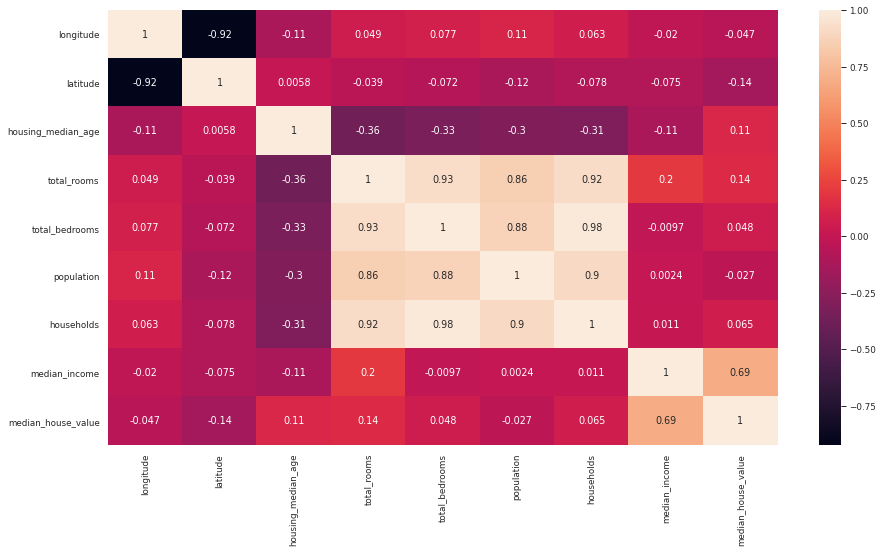

In [155]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = True);

The heatmap above shows us the correlation matrix we calculated. Further, it is clearly visible that there are some liner relationships in the middle between households and population, households and total_bedrooms, etc. 

Let us now try to plot a graph for every feature with every feature 

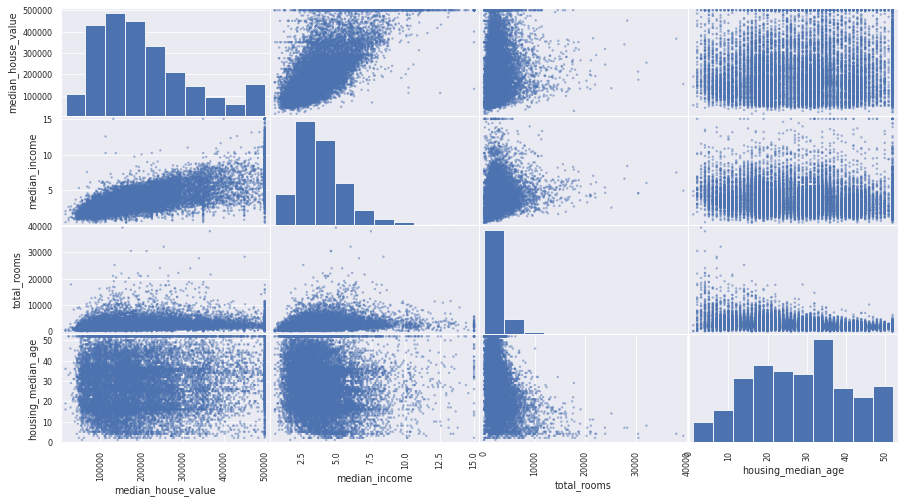

In [156]:
import pandas as pd
from pandas.plotting import scatter_matrix 

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_train_set[attributes], figsize = (15,8));

From the graph, let us see the charts again *median_house_value* which is our target column. It is visible that housing price increases with median income and looks like a liner relationship. Let us plot these two seperately. While this looks liner, fitting a line will still not cut across many many points in the dataset and is more likely to have higher error percentage.

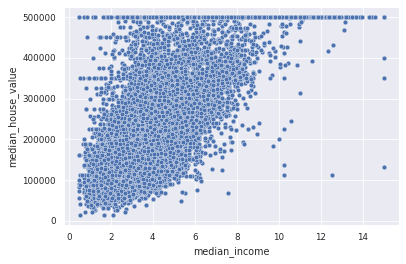

In [157]:
sns.scatterplot(y = "median_house_value", x = "median_income", data = housing_train_set);

Let us now try to combine two or more features to see if the outcome has better correlation with *median_house_value* our label

In [158]:
housing_train_set["rooms_per_household"] = housing_train_set["total_rooms"] / housing_train_set["households"]
housing_train_set["bedrooms_per_room"] = housing_train_set["total_bedrooms"] / housing_train_set["total_rooms"]
housing_train_set["population_per_household"] = housing_train_set["population"] / housing_train_set["households"]

In [159]:
corr_matrix = housing_train_set.corr()
print(corr_matrix["median_house_value"].sort_values(ascending = False))

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


While we got some better correlation, still it does not help much.

# Prepare data for Machine Learning Algorithm
## Step 1 - Seperate predictors (features) and the labels 


In [160]:
housing_train_set_features = housing_train_set.drop("median_house_value", axis = 1)
housing_train_set_label = housing_train_set["median_house_value"].copy()

Let us print the columns in each dataframe

In [161]:
print("Feature columns ----")
print(housing_train_set_features.columns)

Feature columns ----
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'], dtype='object')


## Step 2 - Clean missing data
One can clean the missing data either by dropping corresponding rows, or by replacing the missing values with median, mean or mode for numerical values and "Unknown" for categorical string values 

Sklearn provides SimpleImputer class to perform this opearation
strategy = median will fit in median values at the place of missing values, but before that one has to remove any categorical column as categorical and string columns cannot have a median and this we remove "ocean_proximity" from the dataframe

In [162]:
from sklearn.impute import SimpleImputer
#Create an imputer strategy
imputer = SimpleImputer(strategy = "median")

#Remove "ocean_proximity" column from the dataset
housing_train_set_features_numeric = housing_train_set_features.drop("ocean_proximity", axis = 1)
imputer.fit(housing_train_set_features_numeric)                                                                  

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [163]:
X = imputer.transform(housing_train_set_features_numeric)
housing_tr = pd.DataFrame(X, columns = housing_train_set_features_numeric.columns, index = housing_train_set_features_numeric.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,5.505618,0.193878,3.808989


## Step 3 - Convering string categorical values to float or integer

In [164]:
housing_train_set_features_cat = housing_train_set_features[["ocean_proximity"]]

In [165]:
from sklearn.preprocessing import OrdinalEncoder
#Create an ordinal encoder object
ordinal_encoder = OrdinalEncoder()

#Fit tranform the ordinal encoder to the dataset having only categorical columns
housing_cat_encoded = ordinal_encoder.fit_transform(housing_train_set_features_cat)

#print 10 records for category encoding
housing_cat_encoded[0:11]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [166]:
#Prints the categories which now got converted
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The above encoding mechanism has a drawback which is ML will think it as numbers and will consider 1,2,3,4,5 as close to each other. To resolve this, we need to use 1-hot-encoder which will create new columns for each category and replace 1 and 0 respectively

In [174]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot_encoded = cat_encoder.fit_transform(housing_train_set_features_cat)
print(housing_cat_1hot_encoded.toarray())
print(len(housing_cat_1hot_encoded.toarray()))

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
16512


#Feature scaling 
We initially observed that all numerical values in the features are in huge range with minimum and maximum having a difference of thousands. Let us see that again


In [168]:
housing_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


See following columns with min, max value pairs - 
- total_rooms = { min : 6.0, max : 39320 }
- population = {min : 3, max : 35682 }

an many more features. 

## Why to scale ?
- Having such large range of min and max will impact the RMSE or MAE errors as such big numbers will tend to show more error 

We will perform a mathematical operation to convert all values in the range of 0 and 1


In [179]:
from sklearn.preprocessing import StandardScaler 
std_scaler = StandardScaler()

housing_train_set_features_numeric_scaled = std_scaler.fit_transform(housing_train_set_features_numeric)
print(housing_train_set_features_numeric_scaled)
print(len(housing_train_set_features_numeric_scaled))

[[-1.15604281  0.77194962  0.74333089 ... -0.31205452  0.1912609
  -0.08649871]
 [-1.17602483  0.6596948  -1.1653172  ...  0.21768338 -0.93800768
  -0.03353391]
 [ 1.18684903 -1.34218285  0.18664186 ... -0.46531516  0.4951944
  -0.09240499]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.3469342  -0.57983218
  -0.03055414]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.02499488 -0.33114757
   0.06150916]
 [-1.43579109  0.99645926  1.85670895 ... -0.22852947  0.13032013
  -0.09586294]]
16512


In [195]:
housing_train_set_features_numeric.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'], dtype='object')

In [198]:
pd.DataFrame(data = housing_train_set_features_numeric_scaled[1:,1:], columns = housing_train_set_features_numeric[0,1:])

TypeError: ignored